In [86]:
cd("/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models")
include(join([pwd(), "/function_library/file_modules.jl"]))
refresh_tools("function_library")

Refreshed (2021-02-24_1954) GLMNet_tools.jl auto_pull_matlabdatasets.jl cluster_modules.jl feedback_modules.jl file_modules.jl hazard_modules.jl math_modules.jl modeling_tools.jl plotting_tools.jl probabilistic_modules.jl 

# Fixing the various things for a final figure!
See: Constructing a final probabilistic decoding model.pptx!

<ol> 
<li>Fix error propagation in the bootstrapped model fitting
    <ul>
    <li>Don’t propagate error, just get average error and show this
    </ul>

<li> Add explained deviance to the model report

<li>Timeslice revisions
<ul>
<li>Run on subset (MDT mice) with most trials to ensure we get reliable fits for many timeslices. 

<li>Test all the model permutations and get average AIC, BIC
    
    This is our model selection
</ul>
    

<li>Final model revisions
<ul>
<li>Apply the DA predictors only to get the final model AND EXPLAINED DEVIANCE metrics
<li>Plot hazards with bootstrapped CI
    </ul>
    </ol>

# Before fixing issues: standard nested model, DAHx + DA

-----------------------------------------------
	
Initializing run_collated_model for nestlogit_200hxdst-150_B5TEST
	
Found 2 sessions in /Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/CSVfigures/collatedCSV_doubleb5d13/sessions:
1. b5_SNc_13
2. b5_SNc_13_2
	Using only a subset of these sessions:
b5_SNc_13
b5_SNc_13_2
	
-----------------------------------------------
Processing b5_SNc_13...(2021-02-23_1830)
      *---------- (1/2) 02/23/21 18:30:335
	
truncating data back: -0.15s
"     WARNING: The end of baseline is same as begin of LOI on tNo 100 iter=1"
0.0733
0.0733
"     WARNING: NB that we are normalizing history separate from in-trial dopamine..."
Downsampling the no-lick state => using 477=n, the number of first-licks
   *---------- (1/100) 02/23/21 18:30:896
   *=--------- (10/100) 02/23/21 18:31:188
   *==-------- (20/100) 02/23/21 18:31:381
   *===------- (30/100) 02/23/21 18:31:597
   *====------ (40/100) 02/23/21 18:31:781
   *=====----- (50/100) 02/

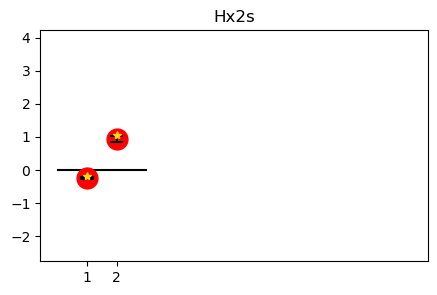

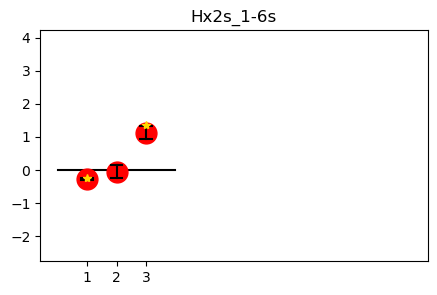

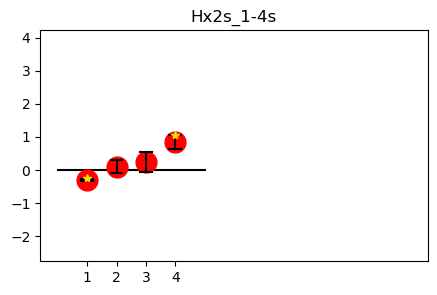

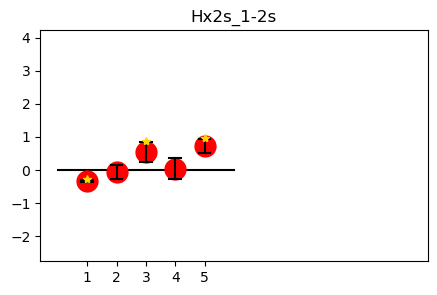

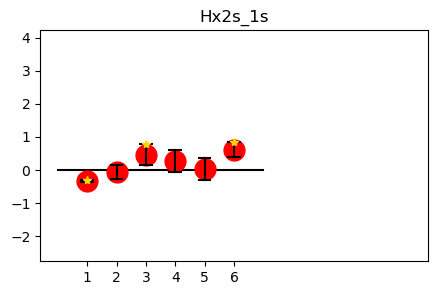

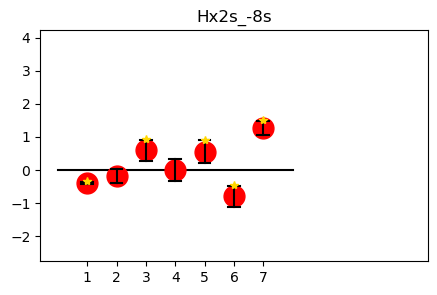

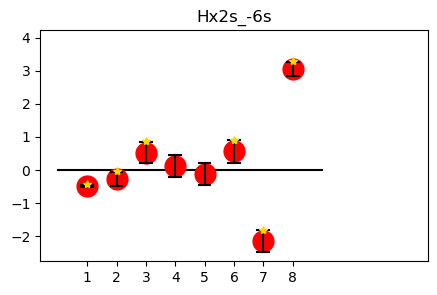

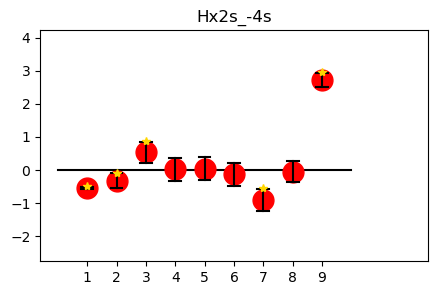

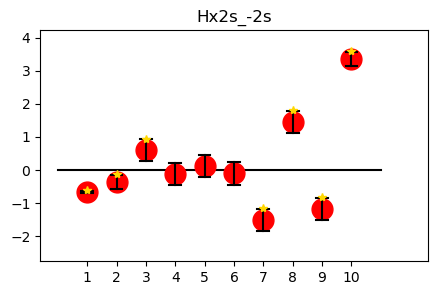

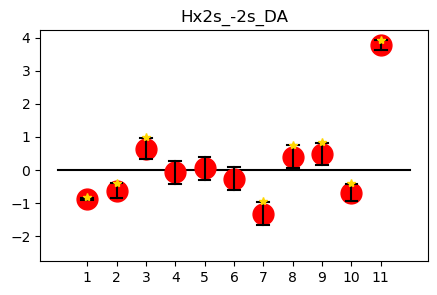

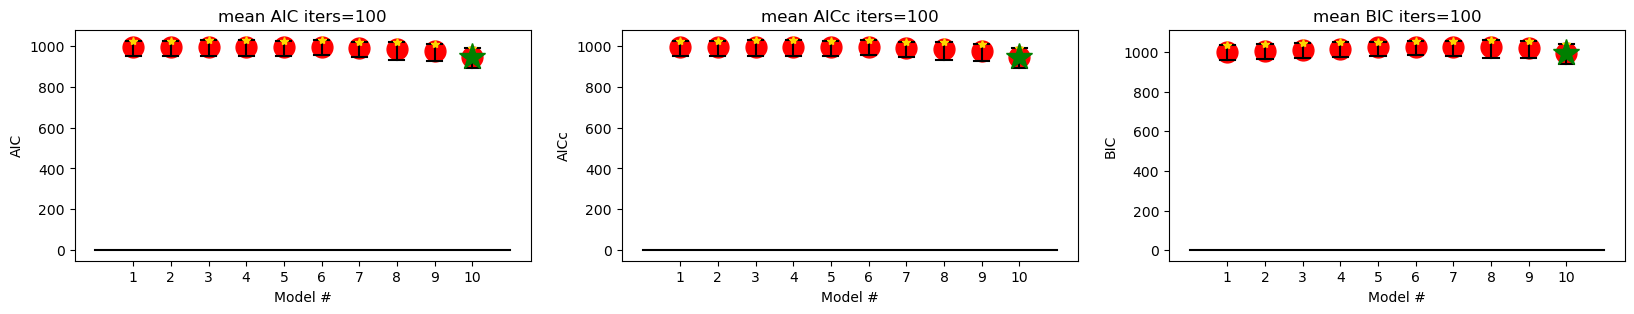

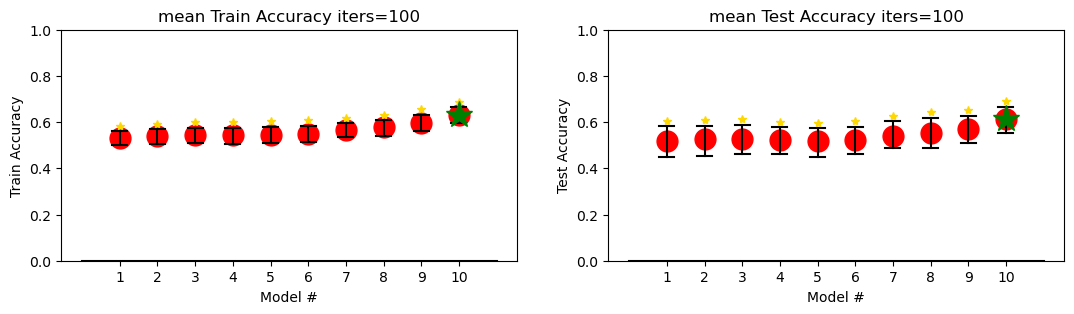

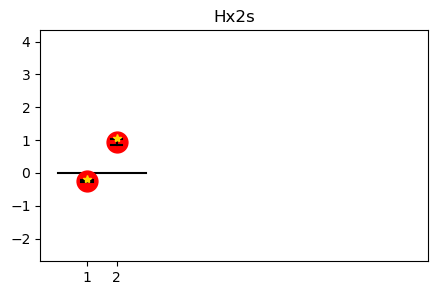

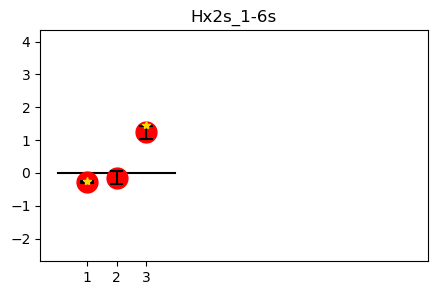

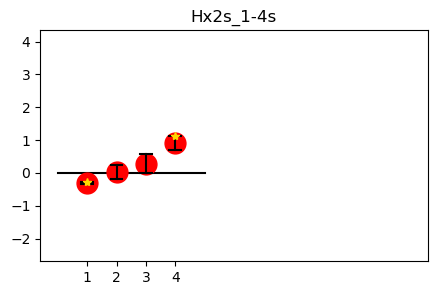

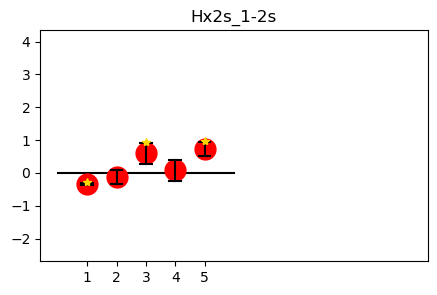

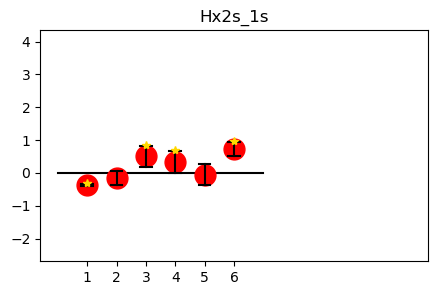

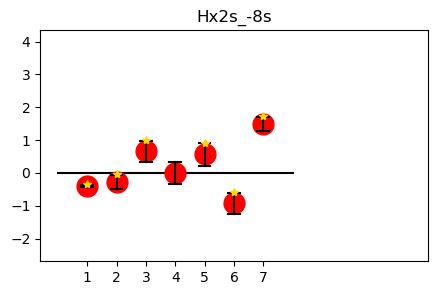

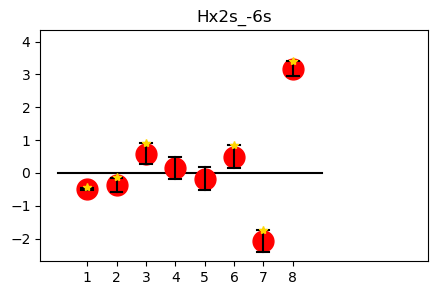

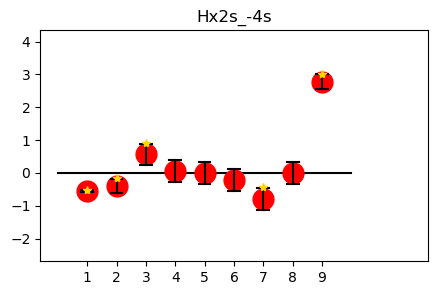

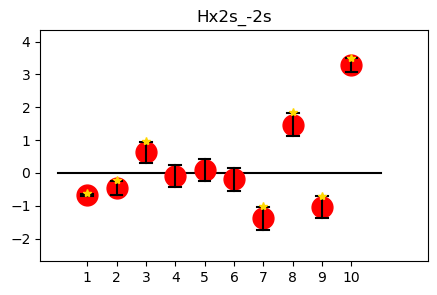

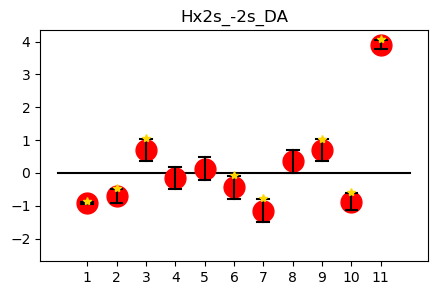

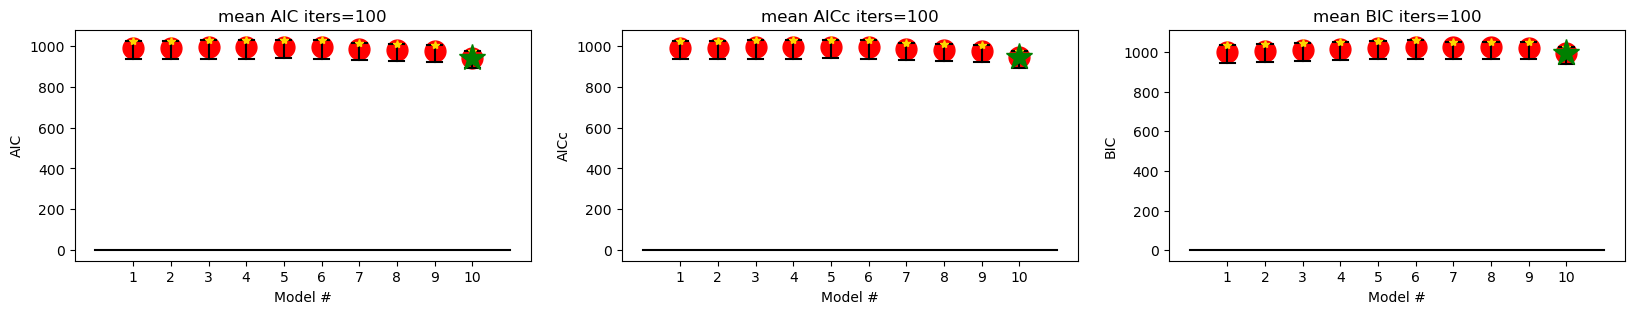

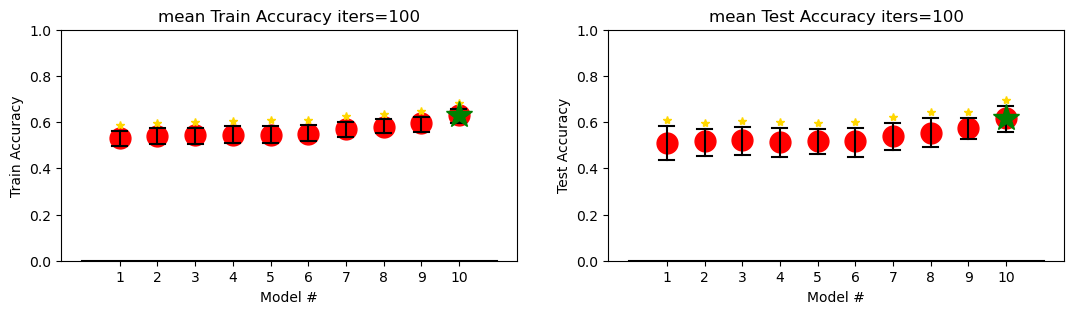

Post-modeling collation of results complete and variables saved to:
/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/CSVfigures/collatedCSV_doubleb5d13/Collated_results_nestlogit_200hxdst-150_B5TEST
	
-----------------------------------------------
	


In [3]:
runID = "dst-150_B5TEST"
collatedPath = "/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/CSVfigures/collatedCSV_doubleb5d13/sessions"
modelpackagefunction = nestlogit_200hx_pkg#fullmodel_ocs_logit_200hx_pkg
postprocessingfunction = template_postprocessingfunction#bootlogit_timeslice_postprocessingfunction1

(fails, results,postprocessing) = run_collated_model(collatedPath, modelpackagefunction; 
    pathIDx = 1:2,runFails=false, failDirs=[], 
    postprocessingfunction=postprocessingfunction,
    compositesavepath="", runID=runID, suppressFigures=false); 

# Getting the explained deviance of the model rather than % correct

The logit model fitting function is `build_and_report_logit_model`, and it currently reports a percent correct.

However, explained deviance is more useful. (https://bookdown.org/egarpor/SSS2-UC3M/logreg-deviance.html)

the deviance is defined as the difference of likelihoods between the fitted model and the saturated model:

$$D=−2\log lik(\hat{β})+2\log lik(saturated model)$$

 
Since the likelihood of the saturated model is exactly one, then the deviance is simply another expression of the likelihood:

$$D=−2\log lik(\hat{β})$$
 
As a consequence, the deviance is always >= 0, being zero only if the fit is perfect.

A benchmark for evaluating the magnitude of the deviance is the null deviance,

$$D_0=−2\log lik(\hat{β_0})$$
 
which is the deviance of the worst model, the one fitted without any predictor, to the perfect model:

$$Y|(X1=x1,…,Xk=xk)∼Ber(logistic(β_0))$$
 
In this case, 

$$\hat{β_0}=logit(\frac{m}{n}) = \log \frac{ \frac{m}{n} }{1 − \frac{m}{n}} $$

where m is the number of 1’s in Y1,…,Yn.

    So, (1/2)/(1 - 1/2) = 1, log(1) = 0 for us for a perfect model.
    
    The deviance is then:
    
$$D_0 = −2\log lik(0)$$

The null deviance serves for comparing how much the model has improved by adding the predictors X1,…,Xk. This can be done by means of the $R^2$ statistic, which is a generalization of the determination coefficient in multiple linear regression:

$$R^2=1−\frac{D}{D_0}=1−\frac{\text{deviance(fitted logistic, saturated model)}}{\text{deviance(null model, saturated model)}}$$

This is convenient, because explained deviance of our perfectly balanced model is going to be the 1-deviance measure (since $D_0$ is 1)

This global measure of fit shares some important properties with the determination coefficient in linear regression:

1. It is a quantity between  0 and 1.
2. If the fit is perfect, then  $D=0$  and  $R^2=1$. 
3. If the predictors do not add anything to the regression, then  $D=D_0$  and  $R^2=0$.


In logistic regression, $R^2$  does not have the same interpretation as in linear regression:

1. Is not the percentage of variance explained by the logistic model, but rather a ratio indicating how close is the fit to being perfect or the worst.
2. It is not related to any correlation coefficient.

22


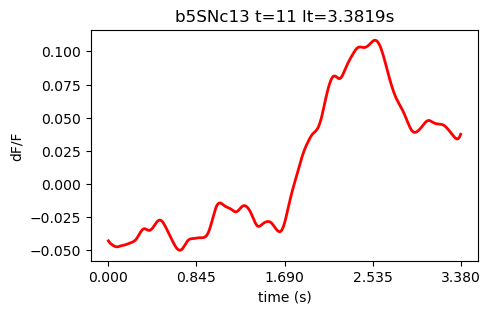

mean: 0.0121375603539823
median: -0.015091
/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5d13_CSV/b5d13_st17s_CSV


In [4]:
path ="/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5d13_CSV/b5d13_st17s_CSV";
data = extract_data(path);
truncated_data = truncate_at_cue_and_lickp250(data)
idx = check_imported_data(truncated_data, idx=11); #290 is good

In [9]:
truncated_data.xdata;

In [66]:
norm_df = makeSessionDataFrame(truncated_data; normalize=true, includeBL_LOI=false, baseline_data=truncated_data, LOI_data=truncated_data, include_history=false, history_spacing_s=0.25, n_hx_terms = 10, cut_out_cue=false)
df = updownsample(norm_df, norm_df[:LickState], 515, downOnly=true);
# X2, y2 =smote(norm_df[!,[:Y, :X]], norm_df.LickState, k = 5, pct_under = 150, pct_over = 200)
# df_balanced = X2
# df_balanced.LickState = y2;

# df = df_balanced;
describe(df)
train, test = TrainTestSplit(df,.75);
countmap(df.LickState)

Dict{Bool,Int64} with 2 entries:
  false => 515
  true  => 515

Accuracy of the training model is : 0.6443037974683544
ROCNums{Int64}
  p = 401
  n = 389
  tp = 248
  tn = 261
  fp = 128
  fn = 153

Accuracy of the test model is : 0.6583333333333333
deviance_explained of the train model is : 0.09459818581363533
deviance_explained of the test model is : 0.07815087803225917
ROCNums{Int64}
  p = 114
  n = 126
  tp = 73
  tn = 85
  fp = 41
  fn = 41



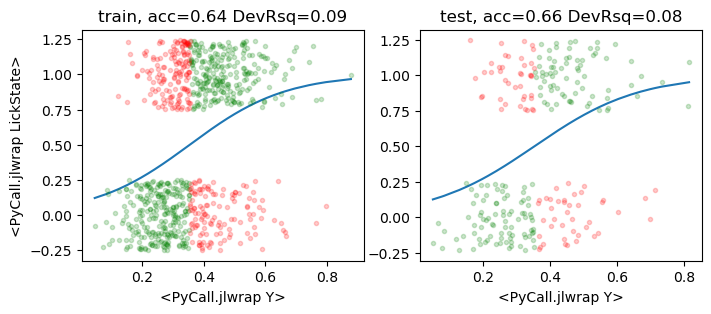

TRAINING
StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},LogitLink},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

LickState ~ 1 + Y

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      z  Pr(>|z|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  -2.27204    0.258465  -8.79    <1e-17   -2.77862   -1.76546
Y             6.41594    0.696504   9.21    <1e-19    5.05082    7.78106
────────────────────────────────────────────────────────────────────────
TEST
StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},LogitLink},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

LickState ~ 1 + Y

Coefficients:
────────────────────────────────────────────────────────────────────────
                C

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

(StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},LogitLink},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

LickState ~ 1 + Y

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      z  Pr(>|z|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  -2.27204    0.258465  -8.79    <1e-17   -2.77862   -1.76546
Y             6.41594    0.696504   9.21    <1e-19    5.05082    7.78106
────────────────────────────────────────────────────────────────────────, StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},LogitLink},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

LickState ~ 1 + Y

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. E

In [101]:
Formula = @formula(LickState ~ Y) 
(logit_model, logit_model_test, accuracy_Sn, accuracy) = build_and_report_logit_model(Formula, train, test; modelName="model", modelClass="logit", verbose=true, figurePath=".")

In [100]:
cd("/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models")
include(join([pwd(), "/function_library/file_modules.jl"]))
refresh_tools("function_library")

Refreshed (2021-02-24_2036) GLMNet_tools.jl auto_pull_matlabdatasets.jl cluster_modules.jl feedback_modules.jl file_modules.jl hazard_modules.jl math_modules.jl modeling_tools.jl plotting_tools.jl probabilistic_modules.jl 

In [92]:
deviance_explained([1,1,0],[0.8,0.6,0.2])

(1.9142254527888203, 3.8190850097688767, -0.0, 0.49877380370104274)

Accuracy of the training model is : 0.6443037974683544
ROCNums{Int64}
  p = 401
  n = 389
  tp = 248
  tn = 261
  fp = 128
  fn = 153

Accuracy of the test model is : 0.6583333333333333
deviance_explained of the train model is : 0.09459818581363533
deviance_explained of the test model is : 0.07815087803225917
ROCNums{Int64}
  p = 114
  n = 126
  tp = 73
  tn = 85
  fp = 41
  fn = 41



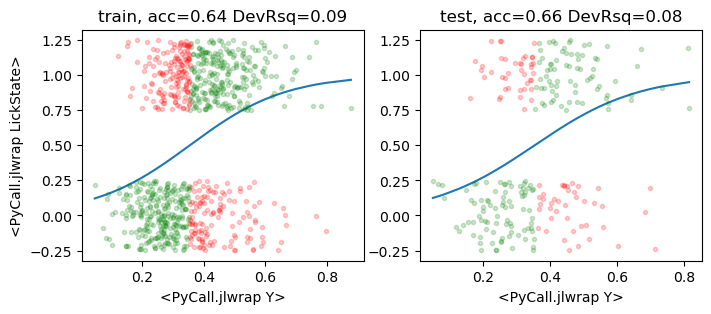

TRAINING
StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},LogitLink},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

LickState ~ 1 + Y

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      z  Pr(>|z|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  -2.27204    0.258465  -8.79    <1e-17   -2.77862   -1.76546
Y             6.41594    0.696504   9.21    <1e-19    5.05082    7.78106
────────────────────────────────────────────────────────────────────────
TEST
StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},LogitLink},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

LickState ~ 1 + Y

Coefficients:
────────────────────────────────────────────────────────────────────────
                C

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

(StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},LogitLink},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

LickState ~ 1 + Y

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      z  Pr(>|z|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  -2.27204    0.258465  -8.79    <1e-17   -2.77862   -1.76546
Y             6.41594    0.696504   9.21    <1e-19    5.05082    7.78106
────────────────────────────────────────────────────────────────────────, StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},LogitLink},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

LickState ~ 1 + Y

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. E

In [102]:
Formula = @formula(LickState ~ Y) 
(logit_model, logit_model_test, accuracy_Sn, accuracy) = build_and_report_logit_model(Formula, train, test; modelName="model", modelClass="logit", verbose=true, figurePath=".")

Accuracy of the training model is : 0.6468354430379747
ROCNums{Int64}
  p = 401
  n = 389
  tp = 246
  tn = 265
  fp = 124
  fn = 155

Accuracy of the test model is : 0.6541666666666667
deviance_explained of the train model is : 0.09309753309831736
deviance_explained of the test model is : 0.07818104521565317
ROCNums{Int64}
  p = 114
  n = 126
  tp = 72
  tn = 85
  fp = 41
  fn = 42



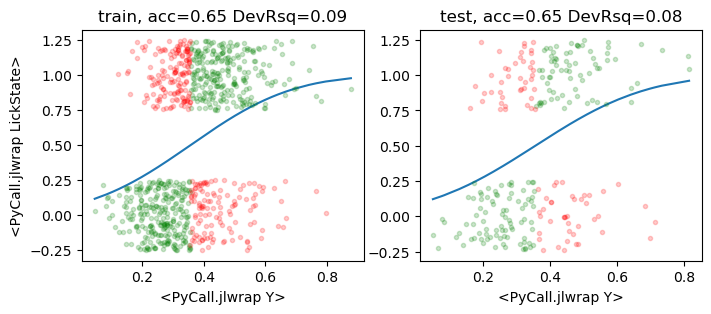

TRAINING
StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},ProbitLink},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

LickState ~ 1 + Y

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      z  Pr(>|z|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  -1.35915    0.151313  -8.98    <1e-18   -1.65572   -1.06259
Y             3.81289    0.403483   9.45    <1e-20    3.02208    4.60371
────────────────────────────────────────────────────────────────────────
TEST
StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},ProbitLink},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

LickState ~ 1 + Y

Coefficients:
────────────────────────────────────────────────────────────────────────
               

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

(StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},ProbitLink},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

LickState ~ 1 + Y

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      z  Pr(>|z|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  -1.35915    0.151313  -8.98    <1e-18   -1.65572   -1.06259
Y             3.81289    0.403483   9.45    <1e-20    3.02208    4.60371
────────────────────────────────────────────────────────────────────────, StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},ProbitLink},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

LickState ~ 1 + Y

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std.

In [103]:
Formula = @formula(LickState ~ Y) 
(logit_model, logit_model_test, accuracy_Sn, accuracy) = build_and_report_logit_model(Formula, train, test; modelName="model", modelClass="probit", verbose=true, figurePath=".")

In [68]:
Formula = @formula(LickState ~ 1) 
(logit_model, logit_model_test, accuracy_Sn, accuracy) = build_and_report_logit_model(Formula, train, test; modelName="model", modelClass="logit", verbose=true, figurePath=".")

LoadError: ArgumentError: collection must be non-empty

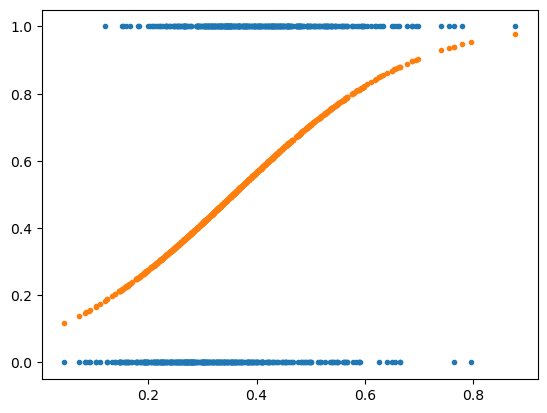

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x164033370>

In [69]:
yfit = StatsBase.predict(logit_model); #(logit_model.model)
y = train.LickState

ix = sortperm(train.Y)
figure
plot(train.Y[ix], y[ix], ".")
plot(train.Y[ix], yfit[ix], ".")

Unbelievably, Julia gives you the deviance but not the null deviance. So we have to figure this out ourselves

In [70]:
deviance(logit_model.model)

993.0493678400087

In [72]:
function explainedDeviance(y, yfit)
    TSS = nansum((y .- nanmean(y)).^2);
    ESS = nansum((yfit .- nanmean(y)).^2);
    RSS = nansum((yfit .- y).^2);
    println("TSS =", TSS)
    println("ESS =", ESS)
    println("RSS =", RSS)
    Rsq = ESS/(RSS+ESS)
    println("Rsq = ESS/(TSS) = ", Rsq)
    return Rsq
end

explainedDeviance (generic function with 1 method)

In [81]:
explainedDeviance(y*1.0, yfit)

TSS =197.45443037974673
ESS =23.31207127851319
RSS =172.08571868223137
Rsq = ESS/(TSS) = 0.11930570598161108


0.11930570598161108

In [80]:
CSV.write("/Users/lilis/Desktop/y.csv",DataFrame(y=y))
CSV.write("/Users/lilis/Desktop/yfit.csv",DataFrame(yfit=yfit))
CSV.write("/Users/lilis/Desktop/X.csv",DataFrame(X=train.Y))

"/Users/lilis/Desktop/X.csv"

# Fixing error propagation

Our bootstrapped model fitting function is `modelSelectionByAICBICxval` -- Yes, the name no longer makes sense, this is not an xval.

Nevertheless, we can use this fxn to bootstrap models to get a better estimate of our downsampled model fit, where we are downsampling the no-lick state.

